In [1]:
print('This is the implementation of the Rabin-Karp Fingerprint Algorithm')

This is the implementation of the Rabin-Karp Fingerprint Algorithm


Found 1 occurrences of 'apple' in file 'file_303.txt'
Found 1 occurrences of 'apple' in file 'file_458.txt'
Found 1 occurrences of 'apple' in file 'file_417.txt'
Found 1 occurrences of 'apple' in file 'file_376.txt'
Found 1 occurrences of 'apple' in file 'file_220.txt'
Found 1 occurrences of 'apple' in file 'file_126.txt'
Found 3 occurrences of 'apple' in file 'file_441.txt'
Found 1 occurrences of 'apple' in file 'file_303.txt'
Found 1 occurrences of 'apple' in file 'file_458.txt'
Found 1 occurrences of 'apple' in file 'file_417.txt'
Found 1 occurrences of 'apple' in file 'file_376.txt'
Found 1 occurrences of 'apple' in file 'file_220.txt'
Found 1 occurrences of 'apple' in file 'file_126.txt'
Found 3 occurrences of 'apple' in file 'file_441.txt'
Found 1 occurrences of 'apple' in file 'file_303.txt'
Found 1 occurrences of 'apple' in file 'file_458.txt'
Found 1 occurrences of 'apple' in file 'file_417.txt'
Found 1 occurrences of 'apple' in file 'file_376.txt'
Found 1 occurrences of 'appl

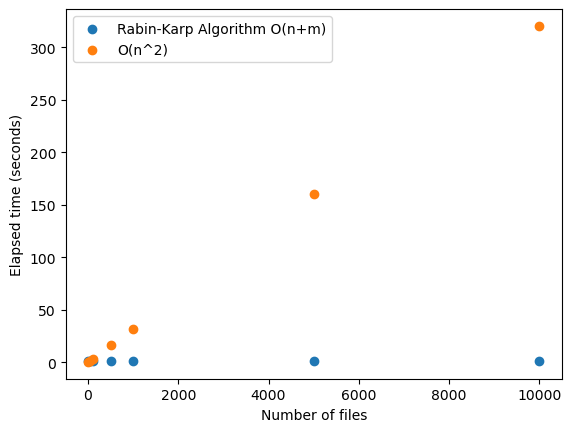

In [26]:
import os
import time
import matplotlib.pyplot as plt

def rabinKarp(path, pattern, d, q):
    n=len(path)
    m=len(pattern)
    h=pow(d, m-1, q)
    p=0
    t0=0
    for i in range(m):
        p=(d*p + ord(pattern[i]))%q
        t0=(d*t0 + ord(path[i]))%q
    occurrences=[]
    for s in range(n-m+1):
        if p==t0:
            if pattern==path[s:s+m]:
                occurrences.append(s)
        if s<n-m:
            t1=(d*(t0-ord(path[s])*h)+ord(path[s+m]))%q
            t0=t1
    return occurrences

def rabinKarpAlgorithm(path, pattern, d, q):
    files=[]
    for file in os.listdir(path):
        if file.endswith(".txt"):
            filePath=os.path.join(path, file)
            with open(filePath, 'r') as f:
                files.append(f.read())
    occurrences = {}
    startTime = time.time()
    for i,file in enumerate(files):
        occurrencesInFiles = rabinKarp(file, pattern, d, q)
        if occurrencesInFiles:
            occurrences[file] = occurrencesInFiles
            print(f"Found {len(occurrencesInFiles)} occurrences of '{pattern}' in file '{os.listdir(path)[i]}'")
    elapsedTime = time.time() - startTime
    return occurrences, elapsedTime
numFiles = [10, 50, 100, 500, 1000, 5000, 10000]
elapsedTimes = []
for n in numFiles:
    path = f'./Files_{n}'
    occurrences,elapsedTime=rabinKarpAlgorithm('./Files','apple',256,101)
    elapsedTimes.append(elapsedTime)
a=elapsedTimes[0]/(numFiles[0]**2)
quadraticTimes = [a*n*2 for n in numFiles]
plt.scatter(numFiles,elapsedTimes,label='Rabin-Karp Algorithm O(n+m)',)
plt.scatter(numFiles,quadraticTimes,label='O(n^2)')
plt.xlabel('Number of files')
plt.ylabel('Elapsed time (seconds)')
plt.legend()
plt.show()